#GMM with 3 species

##Generating data for species

In [1]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Dataset
a = np.array([ list(np.random.randn(500)+5) , list(np.random.randn(500)+5)])
a = a.T
b = np.array( [ list(np.random.randn(500)+5), list(np.random.randn(500)-5)])
b = b.T
c = np.array( [ list( np.random.randn(500)-5), list(np.random.randn(500)+5)] )
c = c.T
d = np.array( [ list( np.random.randn(500)-5), list(np.random.randn(500)-5)] )
d = d.T
e = np.array( [ list( np.random.randn(500)),    list(np.random.randn(500))])
e = e.T

###First specie

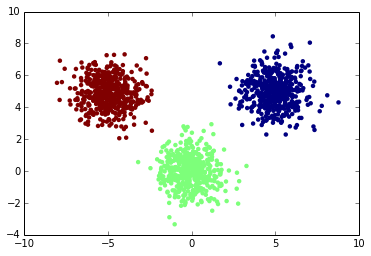

In [3]:
specie1 = np.concatenate((a,e), axis = 0)
specie1 = np.concatenate((specie1,c), axis = 0)
M, N = specie1.shape
y = np.zeros(M)
start = 0
inc = 0
for i in range(3):
    inc = i+1
    end = start + M/3
    y[start:end] = inc
    start = end
pl.scatter(specie1[:, 0], specie1[:, 1], c=y, linewidth=0)

In [4]:
# Generating data for first specie with 7 sample 
data1 = np.concatenate((specie1,specie1), axis = 0)
for i in range(6):
    data1 = np.concatenate((data1,specie1), axis = 0)

###Second specie

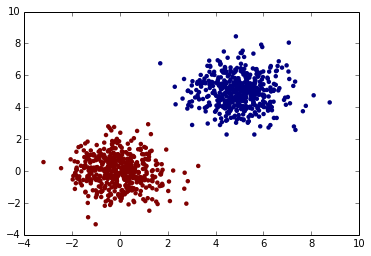

In [5]:
specie2 = np.concatenate((a,e), axis = 0)
M, N = specie2.shape
y = np.zeros(M)
start = 0
inc = 0
for i in range(2):
    inc = i+1
    end = start + M/2
    y[start:end] = inc
    start = end
pl.scatter(specie2[:, 0], specie2[:, 1], c=y, linewidth=0)

In [6]:
# Generating data for second specie with 3 sample 
data2 = np.concatenate((specie2,specie2), axis = 0)
for i in range(2):
    data2 = np.concatenate((data2,specie2), axis = 0)

###Third species

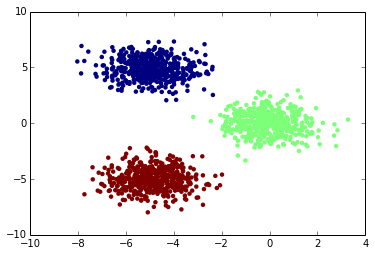

In [7]:
specie3 = np.concatenate((c,e), axis = 0)
specie3 = np.concatenate((specie3,d), axis = 0)
M, N = specie3.shape
y = np.zeros(M)
start = 0
inc = 0
for i in range(3):
    inc = i+1
    end = start + M/3
    y[start:end] = inc
    start = end
pl.scatter(specie3[:, 0], specie3[:, 1], c=y, linewidth=0)

In [8]:
# Generating data for third specie with 4 sample 
data3 = np.concatenate((specie3,specie3), axis = 0)
for i in range(3):
    data3 = np.concatenate((data3,specie3), axis = 0)

###Fourth specie

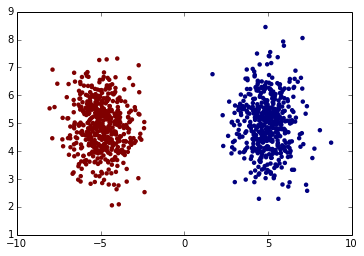

In [9]:
specie4 = np.concatenate((a,c), axis = 0)
M, N = specie4.shape
y = np.zeros(M)
start = 0
inc = 0
for i in range(2):
    inc = i+1
    end = start + M/2
    y[start:end] = inc
    start = end
pl.scatter(specie4[:, 0], specie4[:, 1], c=y, linewidth=0)

In [10]:
# Generating data for fourth specie with 5 sample 
data4 = np.concatenate((specie4,specie4), axis = 0)
for i in range(4):
    data4 = np.concatenate((data4,specie4), axis = 0)

#Training with GMM on individual species

In [11]:
# importing related libraries
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture

GMM for first specie

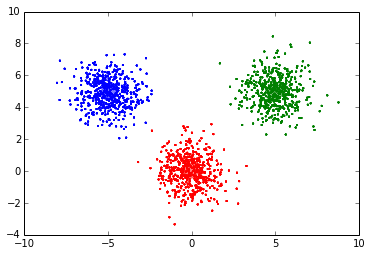

In [12]:
# Fit a mixture of Gaussians with EM using three components
gmm1 = mixture.GMM(n_components=3, covariance_type='spherical')
gmm1.fit(data1)
color_iter = itertools.cycle(['r', 'g', 'b'])
data_predict1 = gmm1.predict(data1)
splot = plt.subplot(1,1,1)
for i, (mean, covar, color) in enumerate(zip(
            gmm1.means_, gmm1._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(data_predict1 == i):
            continue
        plt.scatter(data1[data_predict1 == i, 0], data1[data_predict1 == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

GMM for second specie

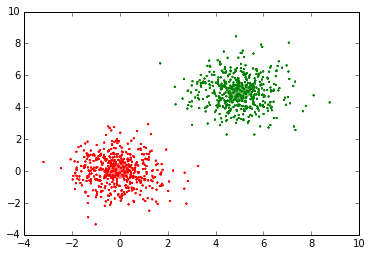

In [13]:
# Fit a mixture of Gaussians with EM using two components
gmm2 = mixture.GMM(n_components=2, covariance_type='spherical')
gmm2.fit(data2)
color_iter = itertools.cycle(['r', 'g', 'b'])
data_predict2 = gmm2.predict(data2)
splot = plt.subplot(1,1,1)
for i, (mean, covar, color) in enumerate(zip(
            gmm2.means_, gmm2._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(data_predict2 == i):
            continue
        plt.scatter(data2[data_predict2 == i, 0], data2[data_predict2 == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

GMM on third specie

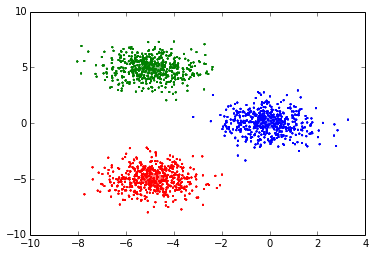

In [14]:
# Fit a mixture of Gaussians with EM using three components
gmm3 = mixture.GMM(n_components=3, covariance_type='spherical')
gmm3.fit(data3)
color_iter = itertools.cycle(['r', 'g', 'b'])
data_predict3 = gmm3.predict(data3)
splot = plt.subplot(1,1,1)
for i, (mean, covar, color) in enumerate(zip(
            gmm3.means_, gmm3._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(data_predict3 == i):
            continue
        plt.scatter(data3[data_predict3 == i, 0], data3[data_predict3 == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

GMM on fourth specie

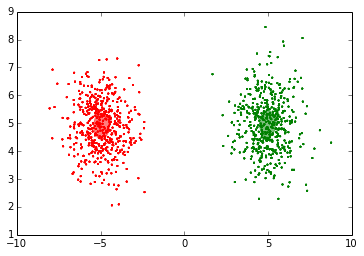

In [15]:
# Fit a mixture of Gaussians with EM using two components
gmm4 = mixture.GMM(n_components=2, covariance_type='spherical')
gmm4.fit(data4)
color_iter = itertools.cycle(['r', 'g', 'b'])
data_predict4 = gmm4.predict(data4)
splot = plt.subplot(1,1,1)
for i, (mean, covar, color) in enumerate(zip(
            gmm4.means_, gmm4._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(data_predict4 == i):
            continue
        plt.scatter(data4[data_predict4 == i, 0], data4[data_predict4 == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

#Testing new specie 

In [16]:
# Starting with as if we are living in a perfect world
newSpecie1 = specie1

In [17]:
# find closest match
r1 = gmm1.bic(newSpecie1)
r2 = gmm2.bic(newSpecie1)
r3 = gmm3.bic(newSpecie1)
r4 = gmm4.bic(newSpecie1)
# returning position
result = np.array([r1, r2, r3, r4])
position = result.argmin() + 1
# newSpecies data matches with gmm model number
position

1

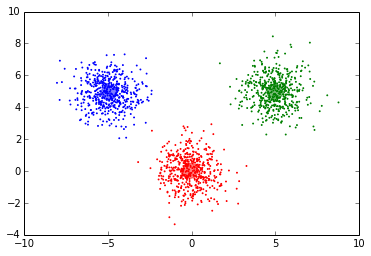

In [18]:
# find labels 
label_newSpecie1 = gmm1.predict(newSpecie1)
# plotting
color_iter = itertools.cycle(['r', 'g', 'b'])
splot = plt.subplot(1,1,1)
for i, (mean, covar, color) in enumerate(zip(gmm1.means_, gmm1._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(label_newSpecie1 == i):
            continue
        plt.scatter(newSpecie1[label_newSpecie1 == i, 0], newSpecie1[label_newSpecie1 == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

New species

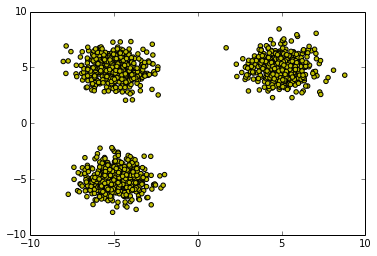

In [19]:
# Now not so perfect world
newSpecie2 = specie4;
newSpecie2 = np.concatenate((newSpecie2,d), axis = 0)
pl.scatter(newSpecie2[:,0], newSpecie2[:,1], c = 'y')

In [20]:
# find closest match
r1 = gmm1.bic(newSpecie2)
r2 = gmm2.bic(newSpecie2)
r3 = gmm3.bic(newSpecie2)
r4 = gmm4.bic(newSpecie2)
# returning position
result = np.array([r1, r2, r3, r4])
position = result.argmin() + 1
# newSpecies data matches with gmm model number
position

1

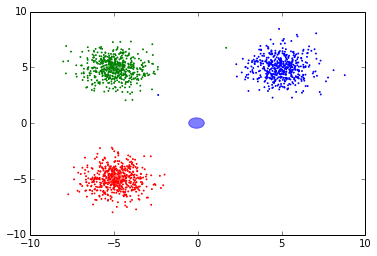

In [21]:
# find labels 
label_newSpecie2 = gmm3.predict(newSpecie2)
# plotting
color_iter = itertools.cycle(['r', 'g', 'b'])
splot = plt.subplot(1,1,1)
for i, (mean, covar, color) in enumerate(zip(gmm3.means_, gmm3._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(label_newSpecie2 == i):
            continue
        plt.scatter(newSpecie2[label_newSpecie2 == i, 0], newSpecie2[label_newSpecie2 == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

#Bayesian to improve classification in case on incomplete data

In [22]:
# libraries for bayesian
from sklearn.naive_bayes import GaussianNB

In [23]:
# Gaussian Naive-Bayes with no calibration
## Naive-bayes for all the species but applying individually
bay1 = GaussianNB()
# data1 is the training data and data_predict1 is the labels returned by the gaussian-mixture-model
bay1.fit(data1, data_predict1)
# for rest of the species
bay2 = GaussianNB()
bay2.fit(data2, data_predict2)

bay3 = GaussianNB()
bay3.fit(data3, data_predict3)

bay4 = GaussianNB()
bay4.fit(data4, data_predict4)

GaussianNB()

In [24]:
bay1.classes_

array([0, 1, 2])

In [25]:
bay2.classes_

array([0, 1])

In [26]:
bay3.classes_

array([0, 1, 2])

In [27]:
bay4.classes_

array([0, 1])

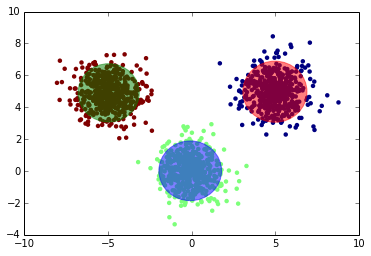

In [28]:
M, N = specie1.shape
y = np.zeros(M)
color_iter = itertools.cycle(['b', 'r', 'g'])
splot = pl.subplot(1,1,1)
start = 0
inc = 0
for i in range(3):
    inc = i+1
    end = start + M/3
    y[start:end] = inc
    start = end
pl.scatter(specie1[:, 0], specie1[:, 1], c=y, linewidth=0)
# plotting
for i, (mean, covar, color) in enumerate(zip(bay1.theta_, bay1.sigma_, color_iter)):
    ell = mpl.patches.Circle(mean, covar[0]+covar[1], color = color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

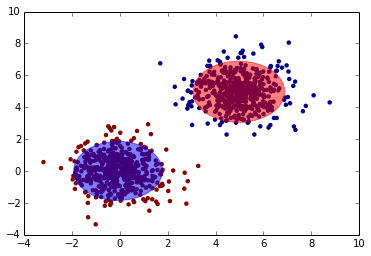

In [29]:
M, N = specie2.shape
y = np.zeros(M)
color_iter = itertools.cycle(['b', 'r', 'g'])
splot = pl.subplot(1,1,1)
start = 0
inc = 0
for i in range(2):
    inc = i+1
    end = start + M/2
    y[start:end] = inc
    start = end
pl.scatter(specie2[:, 0], specie2[:, 1], c=y, linewidth=0)
# plotting
for i, (mean, covar, color) in enumerate(zip(bay2.theta_, bay2.sigma_, color_iter)):
    ell = mpl.patches.Circle(mean, covar[0]+covar[1], color = color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

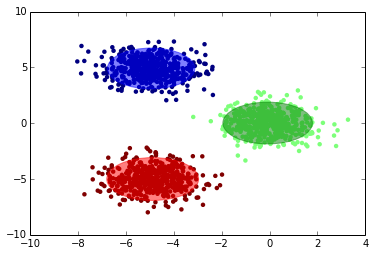

In [30]:
M, N = specie3.shape
y = np.zeros(M)
color_iter = itertools.cycle(['r', 'b', 'g'])
splot = pl.subplot(1,1,1)
start = 0
inc = 0
for i in range(3):
    inc = i+1
    end = start + M/3
    y[start:end] = inc
    start = end
pl.scatter(specie3[:, 0], specie3[:, 1], c=y, linewidth=0)
# plotting
for i, (mean, covar, color) in enumerate(zip(bay3.theta_, bay3.sigma_, color_iter)):
    ell = mpl.patches.Circle(mean, covar[0]+covar[1], color = color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

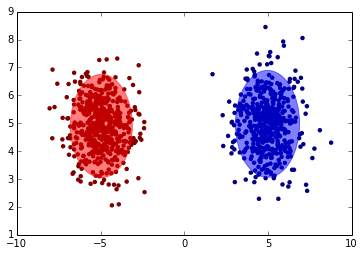

In [36]:
M, N = specie4.shape
y = np.zeros(M)
color_iter = itertools.cycle(['r', 'b', 'g'])
splot = pl.subplot(1,1,1)
start = 0
inc = 0
for i in range(2):
    inc = i+1
    end = start + M/2
    y[start:end] = inc
    start = end
pl.scatter(specie4[:, 0], specie4[:, 1], c=y, linewidth=0)
# plotting
for i, (mean, covar, color) in enumerate(zip(bay4.theta_, bay4.sigma_, color_iter)):
    ell = mpl.patches.Circle(mean, covar[0]+covar[1], color = color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

In [32]:
from sklearn.metrics import accuracy_score
res = bay1.predict(newSpecie1)
acc_bay1 = accuracy_score(label_newSpecie1, res)
print("\tAccuracy using bayesian model 1: %1.2f" %acc_bay1)
res = bay2.predict(newSpecie1)
acc_bay2 = accuracy_score(label_newSpecie1, res)
print("\tAccuracy using bayesian model 2: %1.2f" %acc_bay2)
res = bay3.predict(newSpecie1)
acc_bay3 = accuracy_score(label_newSpecie1, res)
print("\tAccuracy using bayesian model 3: %1.2f" %acc_bay3)
res = bay4.predict(newSpecie1)
acc_bay4 = accuracy_score(label_newSpecie1, res)
print("\tAccuracy using bayesian model 4: %1.2f" %acc_bay4)

	Accuracy using bayesian model 1: 1.00
	Accuracy using bayesian model 2: 0.67
	Accuracy using bayesian model 3: 0.00
	Accuracy using bayesian model 4: 0.52


In [33]:
res = bay1.predict(newSpecie2)
acc_bay1 = accuracy_score(label_newSpecie2, res)
print("\tAccuracy using bayesian model 1: %1.2f" %acc_bay1)
res = bay2.predict(newSpecie2)
acc_bay2 = accuracy_score(label_newSpecie2, res)
print("\tAccuracy using bayesian model 2: %1.2f" %acc_bay2)
res = bay3.predict(newSpecie2)
acc_bay3 = accuracy_score(label_newSpecie2, res)
print("\tAccuracy using bayesian model 3: %1.2f" %acc_bay3)
res = bay4.predict(newSpecie2)
acc_bay4 = accuracy_score(label_newSpecie2, res)
print("\tAccuracy using bayesian model 4: %1.2f" %acc_bay4)

	Accuracy using bayesian model 1: 0.33
	Accuracy using bayesian model 2: 0.33
	Accuracy using bayesian model 3: 1.00
	Accuracy using bayesian model 4: 0.33


In [34]:
from sklearn.metrics import hamming_loss
res = bay1.predict(newSpecie1)
acc_bay1 = hamming_loss(label_newSpecie1, res)
print("\tHamming_loss using bayesian model 1: %1.2f" %acc_bay1)
res = bay2.predict(newSpecie1)
acc_bay2 = hamming_loss(label_newSpecie1, res)
print("\tHamming_loss using bayesian model 2: %1.2f" %acc_bay2)
res = bay3.predict(newSpecie1)
acc_bay3 = hamming_loss(label_newSpecie1, res)
print("\tHamming_loss using bayesian model 3: %1.2f" %acc_bay3)
res = bay4.predict(newSpecie1)
acc_bay4 = hamming_loss(label_newSpecie1, res)
print("\tHamming_loss using bayesian model 4: %1.2f" %acc_bay4)

	Hamming_loss using bayesian model 1: 0.00
	Hamming_loss using bayesian model 2: 0.33
	Hamming_loss using bayesian model 3: 1.00
	Hamming_loss using bayesian model 4: 0.48


In [35]:
res = bay1.predict(newSpecie2)
acc_bay1 = hamming_loss(label_newSpecie2, res)
print("\tHamming_loss using bayesian model 1: %1.2f" %acc_bay1)
res = bay2.predict(newSpecie2)
acc_bay2 = hamming_loss(label_newSpecie2, res)
print("\tHamming_loss using bayesian model 2: %1.2f" %acc_bay2)
res = bay3.predict(newSpecie2)
acc_bay3 = hamming_loss(label_newSpecie2, res)
print("\tHamming_loss using bayesian model 3: %1.2f" %acc_bay3)
res = bay4.predict(newSpecie2)
acc_bay4 = hamming_loss(label_newSpecie2, res)
print("\tHamming_loss using bayesian model 4: %1.2f" %acc_bay4)

	Hamming_loss using bayesian model 1: 0.67
	Hamming_loss using bayesian model 2: 0.67
	Hamming_loss using bayesian model 3: 0.00
	Hamming_loss using bayesian model 4: 0.67
